# **Project 6 - EDA Notebook**
**Name:** Sean StClair

**Date:** 2/16/2024

The purpose of this project is to demonstrate the ability to perform and publish a custom EDA, utilizing skills with Jupyter, pandas, Seaborn, and other popular tools for data analytics.

## **Import Dependencies**

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## **Data Acquisition**

In [54]:
# Load the dataset into a pandas DataFrame
geyser = sns.load_dataset('geyser')
print(geyser.columns)

# Inspect first rows of the DataFrame
print(geyser.head())

Index(['duration', 'waiting', 'kind'], dtype='object')
   duration  waiting   kind
0     3.600       79   long
1     1.800       54  short
2     3.333       74   long
3     2.283       62  short
4     4.533       85   long


## **Initial Data Inspection**

In [55]:
print(geyser.head(10))
print(geyser.shape)
print(geyser.dtypes)

   duration  waiting   kind
0     3.600       79   long
1     1.800       54  short
2     3.333       74   long
3     2.283       62  short
4     4.533       85   long
5     2.883       55  short
6     4.700       88   long
7     3.600       85   long
8     1.950       51  short
9     4.350       85   long
(272, 3)
duration    float64
waiting       int64
kind         object
dtype: object


## **Initial Descriptive Statistics**

In [56]:
print(geyser.describe())

         duration     waiting
count  272.000000  272.000000
mean     3.487783   70.897059
std      1.141371   13.594974
min      1.600000   43.000000
25%      2.162750   58.000000
50%      4.000000   76.000000
75%      4.454250   82.000000
max      5.100000   96.000000


## **Initial Data Distribution**

### Numerical Columns

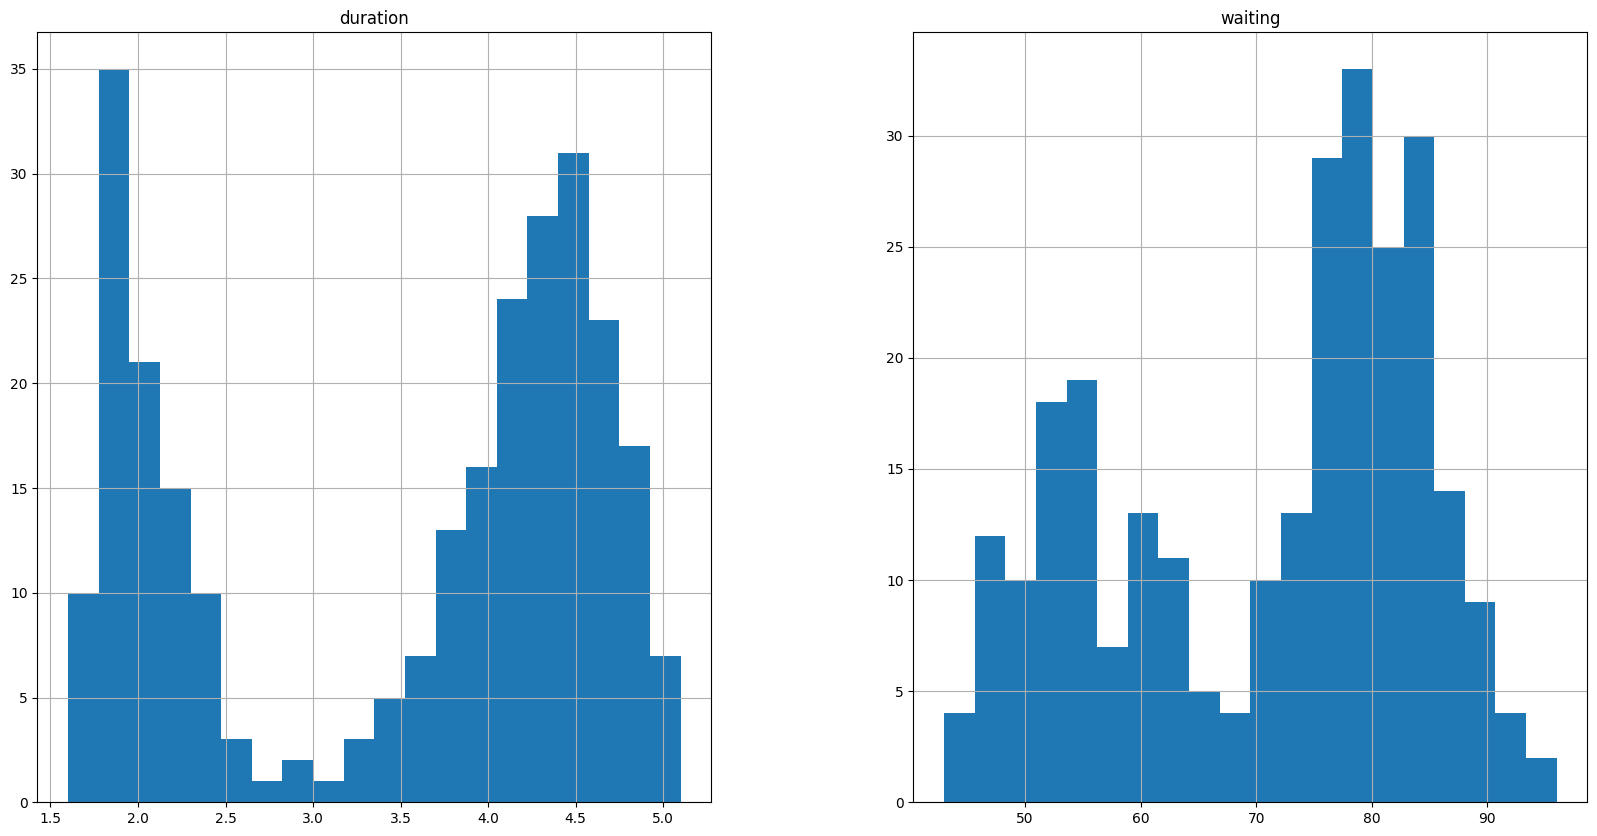

In [57]:
geyser[['duration', 'waiting']].hist(bins=20, figsize=(20, 10))
plt.show()

### Observations:
- Tight grouping around two points for each numerical category
- 'waiting' has a more even distribution than 'eruption'

### Categorical Columns

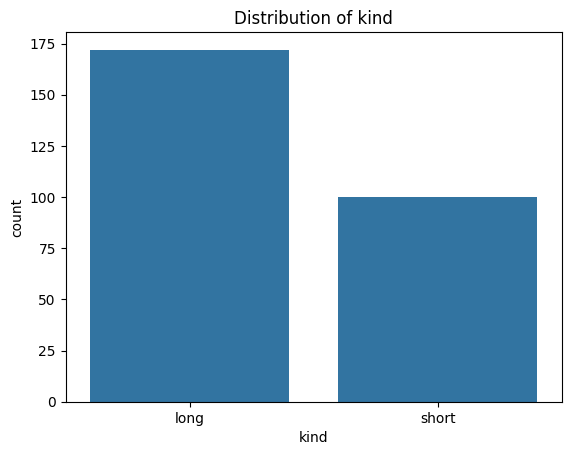

In [58]:
# Inspect value counts by categorical column
geyser['kind'].value_counts()

# Inspect value counts for all categorical columns
for col in geyser.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=geyser)
    plt.title(f'Distribution of {col}')
    plt.show()

### Observations:
- Significantly more long geysers than short

## **Initial Data Transformation and Feature Engineering**

In [59]:
geyser.rename(columns={'duration': 'Eruption', 'waiting': 'Interval', 'kind': 'Geyser Type'}, inplace=True)

In [60]:
geyser['Geyser Cycle Time'] = geyser['Eruption']+geyser['Interval']
print(geyser['Geyser Cycle Time'])


0      82.600
1      55.800
2      77.333
3      64.283
4      89.533
        ...  
267    85.117
268    48.150
269    94.417
270    47.817
271    78.467
Name: Geyser Cycle Time, Length: 272, dtype: float64


## **Initial Visualizations**

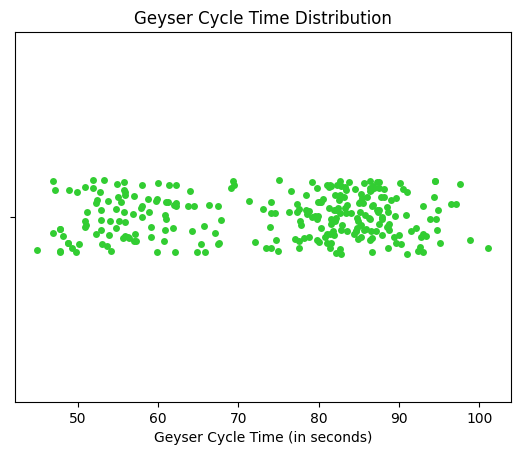

In [61]:
sns.stripplot(x='Geyser Cycle Time', y=None, data=geyser, jitter=True, color='limegreen', size=5)
plt.title('Geyser Cycle Time Distribution')
plt.xlabel('Geyser Cycle Time (in seconds)')
plt.show()

### Figure 1:
- Goal: Show the overall distribution of the complete Geyser Cycle
- Chart Type: Strip Plot
- Observations: Matching charts above, showing grouping of durations in two distinct areas (roughly 55 and 80 seconds)

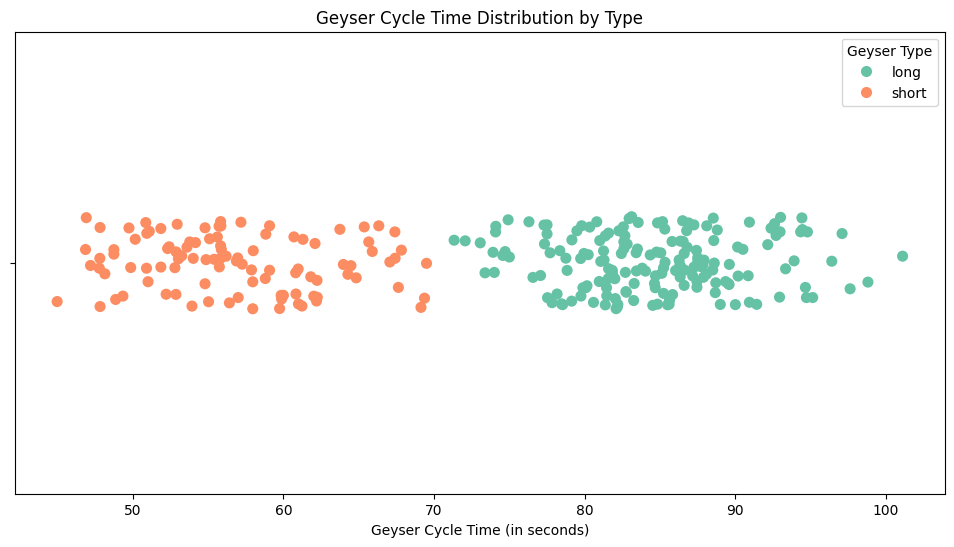

In [62]:
plt.figure(figsize=(12, 6))

sns.stripplot(x='Geyser Cycle Time', hue='Geyser Type', data=geyser, jitter=True, palette='Set2', size=8)

plt.title('Geyser Cycle Time Distribution by Type')
plt.xlabel('Geyser Cycle Time (in seconds)')
plt.legend(title='Geyser Type')
plt.show()

### Figure 2:
- Goal: Separate overall Geyser Cycle Time Distribution by type
- Chart Type: Strip Plot
- Observations: long and short geysers are clearly separated by duration, few outliers, stronger grouping for long geysers (possibly a result of the greater sample size?)

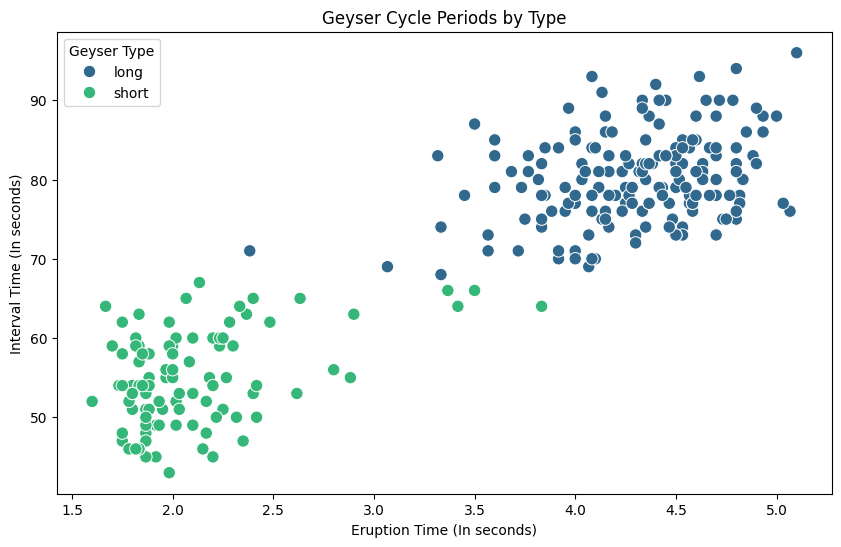

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Eruption', y='Interval', hue='Geyser Type', data=geyser, palette='viridis', s=80)
plt.title('Geyser Cycle Periods by Type')
plt.xlabel('Eruption Time (In seconds)')
plt.ylabel('Interval Time (In seconds)')
plt.legend(title='Geyser Type')
plt.show()

### Figure 3:
- Goal: Show relationships among all original values
- Chart Type: Scatter Plot
- Observations: Similar to charts above, however the scatter plot reveals more outliers and less of a clear separation by type for Eruption Time. Interval Time still has a clear separation by type.